Created by [Mayar Mohsen](https://www.kaggle.com/mayaramein) June 2020  
[Github](https://github.com/mayaramein)   
[Linkedin](https://www.linkedin.com/in/mayaramein/)   
[Twitter](https://twitter.com/mayaramein)    

>This Notebook Contains:
* Exploratory Data Analysis (EDA)
* Preprocess the data
* Visualize the data
* Apply Gradient Boosting Regressor Model
* Model Evaluation

In [1]:
# Data dicretory file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/googleplaystore1/googleplaystore.csv


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

'''Pandas DataFrame is two-dimensional size-mutable, 
potentially heterogeneous tabular data structure with labeled axes (rows and columns). 
A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. 
Pandas DataFrame consists of three principal components, the data, rows, and columns.
'''

# Create a Data frame
df = pd.read_csv('../input/googleplaystore1/googleplaystore.csv', header=0)

In [3]:
# Show the first 5 rows of data

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Exploratory Data Analysis (EDA)


In [4]:
# df.describe(): summary statistics info of data

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


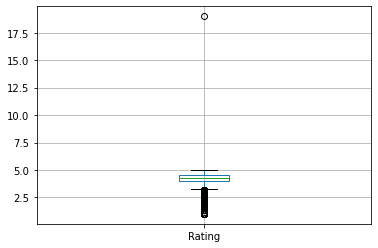

In [5]:
# df.boxplot() : A graph of summary statistics info of data

df.boxplot()

In [6]:
# df.info(): to know the shape of data and summary info of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# calculate null(embty) values 

null_values = df.isnull().sum()
print(null_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


## Preprocess the data

In [8]:
# Show rating more than 5 to remove

df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# remove the column

df.drop([10472],inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fbbe82090>]],
      dtype=object)

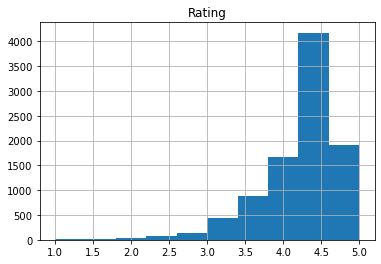

In [10]:
df.hist()

In [11]:
# Fill the null values with appropriate values using aggregate function "median" as the rating histogram is right skewed and it's numerical values

#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())
df.Rating = df['Rating'].transform(impute_median)

In [12]:
# Fill the null values with appropriate values using aggregate function "mode" for categorical values
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)

In [13]:
# Convert the categorical values into numerical 

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

## Visualize the data

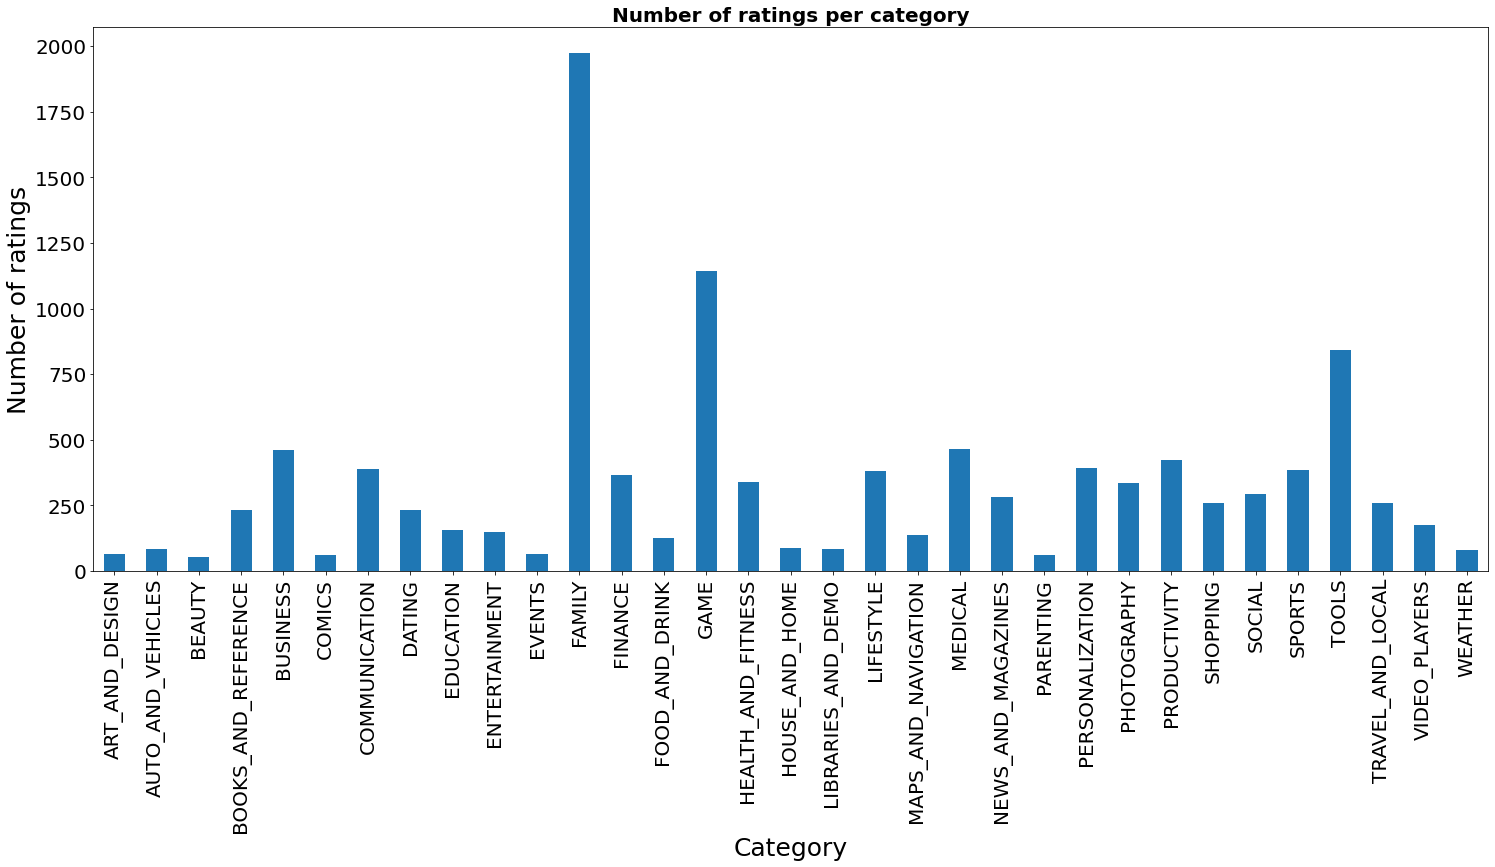

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of ratings per category', fontweight="bold", size=20) # Title
ax.set_ylabel('Number of ratings', fontsize = 25) # Y label
ax.set_xlabel('Categories', fontsize = 25) # X label
df.groupby(['Category']).count()['Rating'].plot(ax=ax, kind='bar')

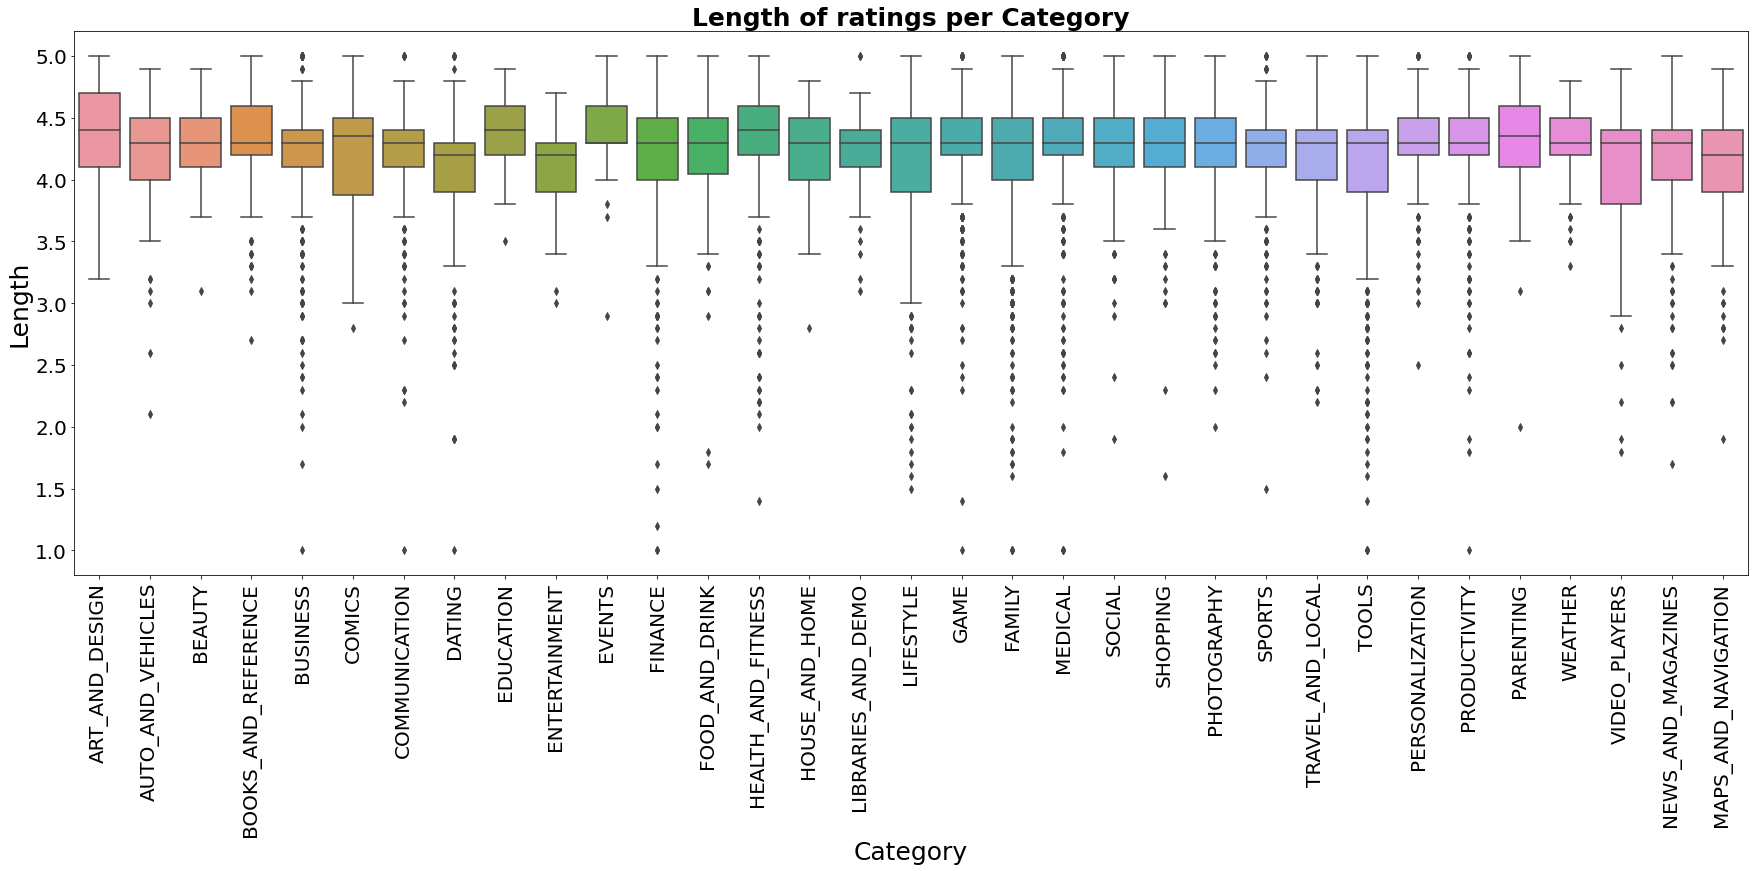

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='Category', y='Rating', data=df,)
plt.xticks(fontsize=20, rotation=90) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Length of ratings per Category', fontweight="bold", size=25) # Title
ax.set_ylabel('Length', fontsize = 25) # Y label
ax.set_xlabel('Category', fontsize = 25) # X label
plt.show()

In [16]:
import numpy as np # linear algebra

df_gp_cat = df.groupby('Category')
y = df_gp_cat['Price'].agg(np.sum)
z = df_gp_cat['Reviews'].agg(np.mean)

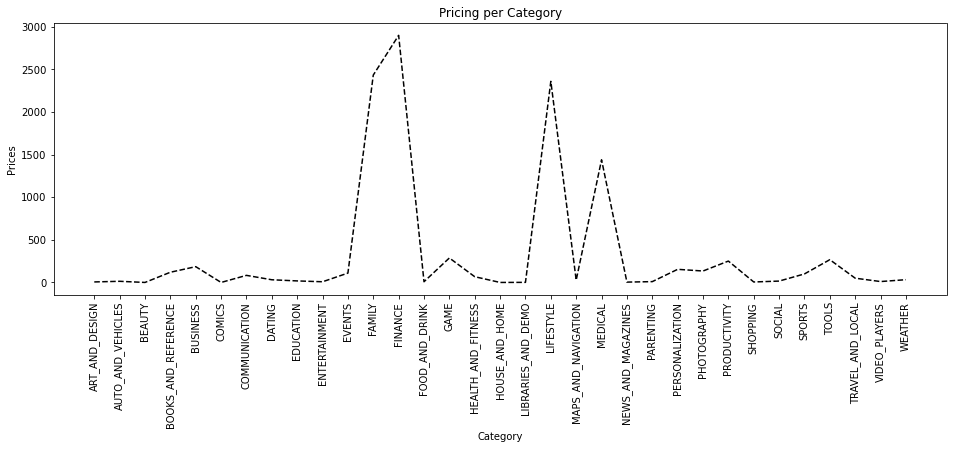

In [17]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='k')
plt.xticks(rotation=90)
plt.title('Pricing per Category')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.show()

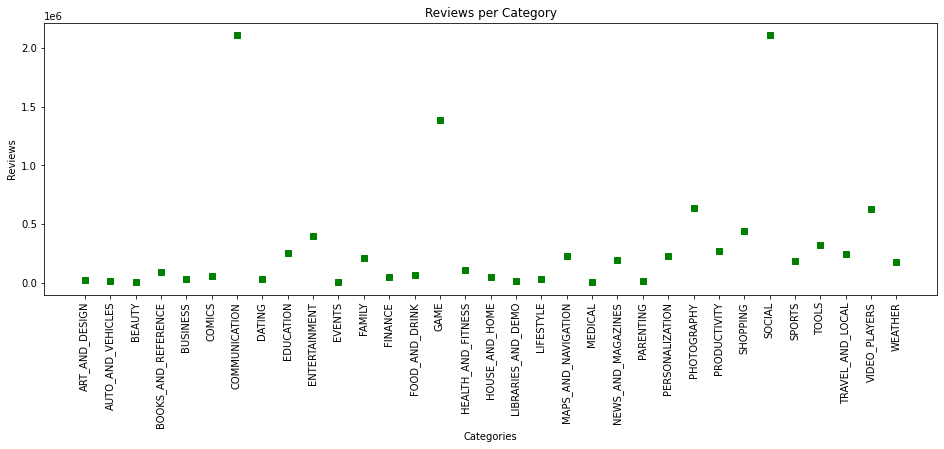

In [18]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Reviews per Category')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

In [19]:
# convert all categorical data into numbers

df['Category']= pd.factorize( df['Category'] )[0].astype(int)
df['Type']= pd.factorize( df['Genres'] )[0].astype(int)
df['Genres']= pd.factorize( df['Genres'] )[0].astype(int)
df['Content Rating']= pd.factorize( df['Genres'] )[0].astype(int)

## Apply Gradient Boosting Regressor Model

In [20]:
# Split the data

X = df.drop(labels = ['App', 'Size', 'Last Updated', 'Current Ver', 'Android Ver'],axis = 1)
y = df.Rating

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
#Applying Gradient Boosting Regressor Model 

from sklearn.ensemble import GradientBoostingRegressor
'''
sklearn.ensemble.GradientBoostingRegressor(loss='ls’, learning_rate=0.1,n_estimators=100, subsample=
                                           1.0, criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,
                                           min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,
                                           min_impurity_split=None,init=None, random_state=None,max_features=None, alpha=0.9,
                                           verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto'
                                           , validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)
'''

GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 0.5 ,random_state=33)
GBRModel.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, random_state=33)

In [22]:
#Calculating Details

print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.9999984015774842
GBRModel Test Score is :  0.9999470162396233


In [23]:
#Calculating Prediction

y_pred = GBRModel.predict(X_test)
print('Predicted Value for GBRModel is : ' , y_pred[:10])

Predicted Value for GBRModel is :  [4.0997376  4.70006763 4.30000951 4.99999324 3.79960875 4.20015201
 3.2989057  4.70006763 4.20015201 4.20015201]


## Model evaluation

In [24]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_train)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.344e+20
Date:                Sun, 02 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:18:29   Log-Likelihood:                      1.2173e+05
No. Observations:                7262   AIC:                                 -2.434e+05
Df Residuals:                    7256   BIC:                                 -2.434e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [25]:
#Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error 

MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.0002861354343899566


In [26]:
#Calculating Mean Squared Error

from sklearn.metrics import mean_squared_error 

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1.2217400732723789e-05


In [27]:
#Calculating Median Squared Error

from sklearn.metrics import median_absolute_error

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Median Squared Error Value is :  0.00013896098047805339
